In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib notebook

class GradientDescentTaskOne():
    def __init__(self):
        self._ein = np.inf
        self._u = [np.float64(1)]
        self._v = [np.float64(1)]
        self._it = -1
    
    def errorFunction(self, u, v):
        return (u*np.exp(v) - 2*v*np.exp(-u))**2
    
    def derivativeWRTu(self, u, v):
        return 2*(np.exp(v) + 2*v*np.exp(-u))*(u*np.exp(v) - 2*v*np.exp(-u))
    
    def derivativeWRTv(self, u, v):
        return 2*(u*np.exp(v) - 2*np.exp(-u))*(u*np.exp(v)-2*v*np.exp(-u))
    
    def gradientDescent(self, learningRate, maxIteration, epsilon, minError):
        for i in range(maxIteration):
            gu = np.float64(self.derivativeWRTu(self._u[-1], self._v[-1]))
            gv = np.float64(self.derivativeWRTv(self._u[-1], self._v[-1]))
            u = np.float64(self._u[-1] - learningRate*gu)
            v = np.float64(self._v[-1] - learningRate*gv)
            
            error = np.float64(self.errorFunction(u,v))
            if error < minError:
                self._it = i
            if abs(self._ein - error) <= epsilon:
                return
            else:
                self._u.append(u)
                self._v.append(v)
                self._ein = error
    
    def gradientDescent2Step(self, learningRate, maxIteration):
        self._u = [1]
        self._v = [1]
        u, v = 1, 1
        for i in range(maxIteration):
            gu = np.float64(self.derivativeWRTu(u,v))
            u = np.float64(u - learningRate*gu)
            self._u.append(u)
            self._v.append(v)
            gv = np.float64(self.derivativeWRTv(u, v))
            v = np.float64(v - learningRate*gv)
            self._u.append(u)
            self._v.append(v)
        return self.errorFunction(u,v)
    
    def closestPair(self, d):
        closest = np.inf
        answer = None
        for p in d.keys():
            dist = np.linalg.norm(np.array(p)-np.array([self._u[-1],self._v[-1]]))
            if dist < closest:
                answer = (p, d[p])
        return answer

In [2]:
task1 = GradientDescentTaskOne()
task1.gradientDescent(0.1, np.int(1e2), 1e-15, 1e-14)
u,v = task1._u, task1._v
it = task1._it

print('u: ', u[-1] ,', v:', v[-1])
print('iteracoes: ', it)

print(40*"-")

pairs = {(1.000, 1.000):"a", (0.713, 0.045):"b", (0.016, 0.112):"c", (-0.083, 0.029):"d", (0.045, 0.024):"e"}
closest = task1.closestPair(pairs)
print("Par (u,v) mais proximo: ", closest[0])

print(40*"-")

error = task1.gradientDescent2Step(0.1, 15)
u2, v2 = task1._u, task1._v
print("Erro \"coordinate descent\" depois de 15 iteracoes: ", error)

u:  0.044736282957351346 , v: 0.02395872707857488
iteracoes:  11
----------------------------------------
Par (u,v) mais proximo:  (0.045, 0.024)
----------------------------------------
Erro "coordinate descent" depois de 15 iteracoes:  0.13981379199615315


<IPython.core.display.Javascript object>


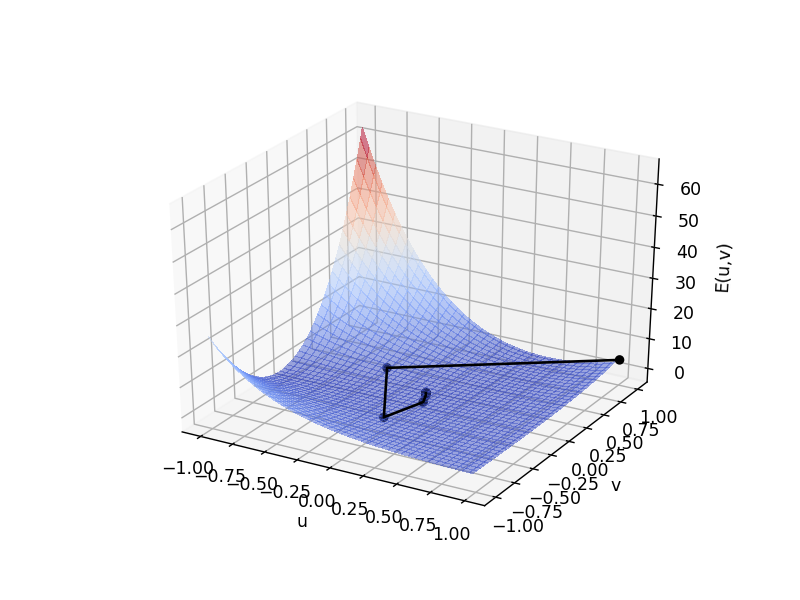

In [5]:
n = 1
errorVec = np.vectorize(task1.errorFunction)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

uPlot, vPlot = np.meshgrid(np.arange(-n, n, 0.025), np.arange(-n, n, 0.025))
z = errorVec(uPlot, vPlot)
ax.plot_surface(uPlot, vPlot, z, cmap=cm.E(u, v) = (uev−2ve−u
)
2coolwarm,
                       linewidth=0, antialiased=False, alpha=0.5)
ax.scatter(u,v, errorVec(u,v), color='black', alpha=1, zorder=1)
ax.set_xlabel("u")
ax.set_ylabel("v")
ax.set_zlabel("E(u,v)")
ax.plot(u,v, errorVec(u,v), color='black', alpha=1, zorder=1)
plt.show()

<IPython.core.display.Javascript object>


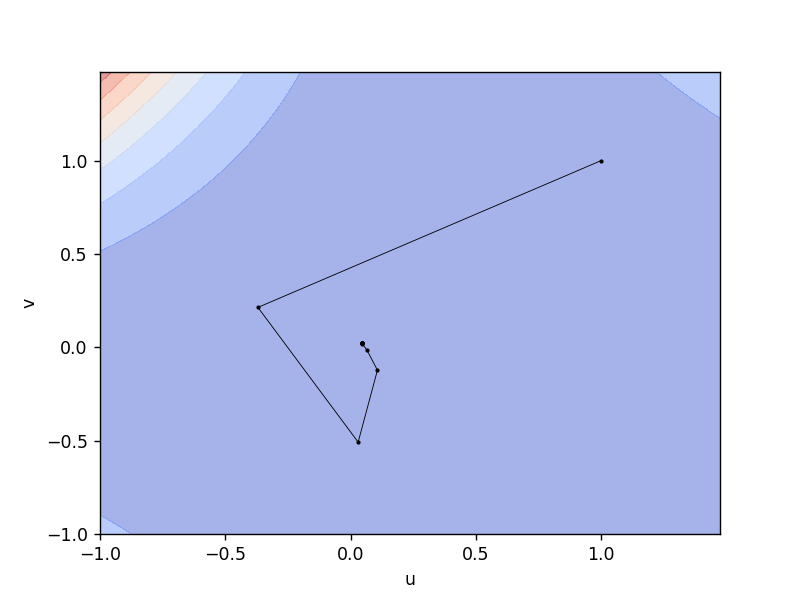

In [6]:
fig = plt.figure()
ax = fig.gca()

uPlot, vPlot = np.meshgrid(np.arange(-n, n+0.5, 0.025), np.arange(-n, n+0.5, 0.025))
z = errorVec(uPlot, vPlot)
ax.contourf(uPlot, vPlot, z, cmap=cm.coolwarm,
                       alpha=0.5)
ax.scatter(u, v, color='black', alpha=1, zorder=1, s=2)
ax.plot(u, v, color='black', alpha=1, zorder=1, lw=0.5)
ax.set_xlabel("u")
ax.set_ylabel("v")
plt.show()

<IPython.core.display.Javascript object>


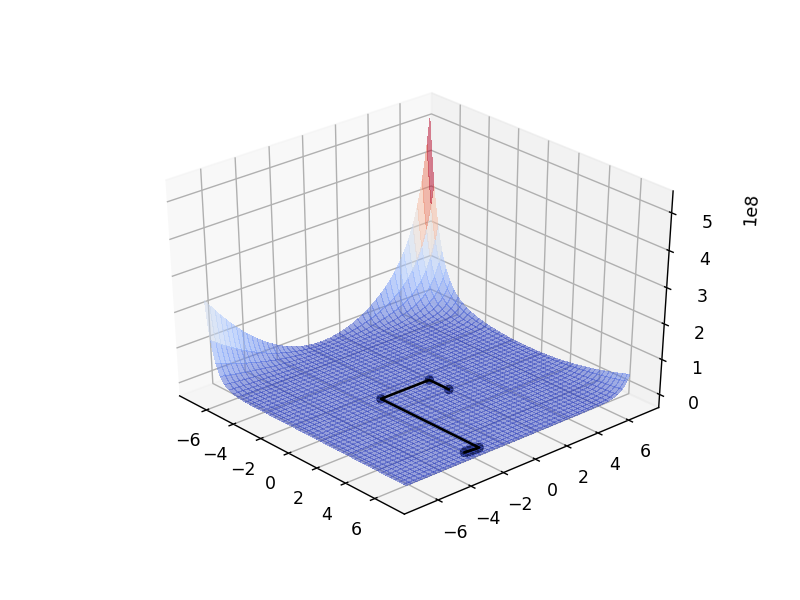

In [9]:
n = 7
errorVec = np.vectorize(task1.errorFunction)

fig = plt.figure()
ax = fig.gca(projection='3d')

uPlot, vPlot = np.meshgrid(np.arange(-n, n, 0.025), np.arange(-n, n, 0.025))
z = errorVec(uPlot, vPlot)
ax.plot_surface(uPlot, vPlot, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha=0.5)
ax.scatter(u2,v2, errorVec(u2,v2), color='black', alpha=1, zorder=1)
ax.plot(u2,v2, errorVec(u2,v2), color='black', alpha=1, zorder=1)
plt.show()

<IPython.core.display.Javascript object>


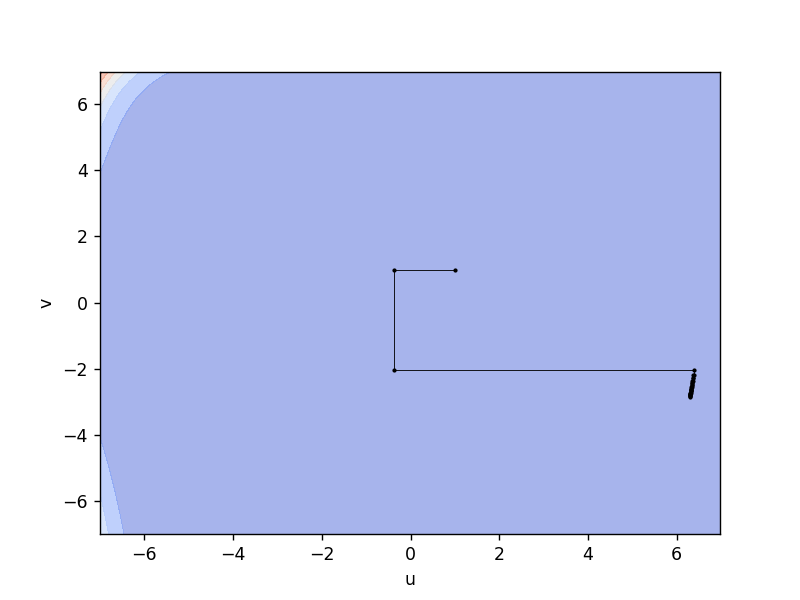

In [10]:
fig = plt.figure()
ax = fig.gca()

uPlot, vPlot = np.meshgrid(np.arange(-7, 7, 0.025), np.arange(-7, 7, 0.025))
z = errorVec(uPlot, vPlot)
ax.contourf(uPlot, vPlot, z, cmap=cm.coolwarm,
                       alpha=0.5)
ax.scatter(u2, v2, color='black', alpha=1, zorder=1, s=2)
ax.plot(u2, v2, color='black', alpha=1, zorder=1, lw=0.5)
ax.set_xlabel("u")
ax.set_ylabel("v")
plt.show()